In [2]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
plt.rc('figure', dpi=105)

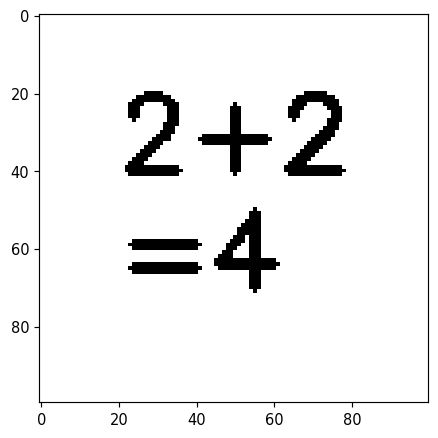

In [4]:
# Przygotuj obraz
img = np.ones((100, 100), dtype=np.uint8)
font = cv.FONT_HERSHEY_SIMPLEX
cv.putText(img, '2+2', (20, 40), font, 0.9, (0,0,0), 2)
cv.putText(img, '=4', (20, 70), font, 0.9, (0,0,0), 2)
img = img.astype(bool)
plt.imshow(img, cmap='gray')

In [7]:
def split_shares(img):
    """
    img msk s1 s2
    0   0   10 10 
    0   1   01 01
    1   0   10 01
    1   1   01 10
    """
    # Zapisz wymiary obrazu.
    W, H = img.shape
    
    # Utwórz dwie trójwymiarowe tablice wypełnione zerami.
    s1, s2 = np.zeros((2, H, W, 2))
    
    # Utwórz maskę określającą prawdopodobieństwo wyboru.
    mask = np.random.rand(H, W) > 0.5

    # Filtruj udziały 
    
    # Biały kolor
    s1[(img == 1) & (mask == 0)] = [1, 0]
    s2[(img == 1) & (mask == 0)] = [1, 0]
    
    s1[(img == 1) & (mask == 1)] = [0, 1]
    s2[(img == 1) & (mask == 1)] = [0, 1]
    
    # Czarny kolor
    s1[(img == 0) & (mask == 0)] = [1, 0]
    s2[(img == 0) & (mask == 0)] = [0, 1]
    
    s1[(img == 0) & (mask == 1)] = [0, 1]
    s2[(img == 0) & (mask == 1)] = [1, 0]
    
    # Przekształć na tablicę dwuwymiarową.
    s1 = s1.reshape(H, 2 * W).astype(bool)
    s2 = s2.reshape(H, 2 * W).astype(bool)
    return s1, s2

def join_shares(x, y):
    """
    0 - black
    1 - white
    
    x y z
    0 0 0
    0 1 0
    1 0 0
    1 1 1
    
    z = x and y
    """
    return x == y

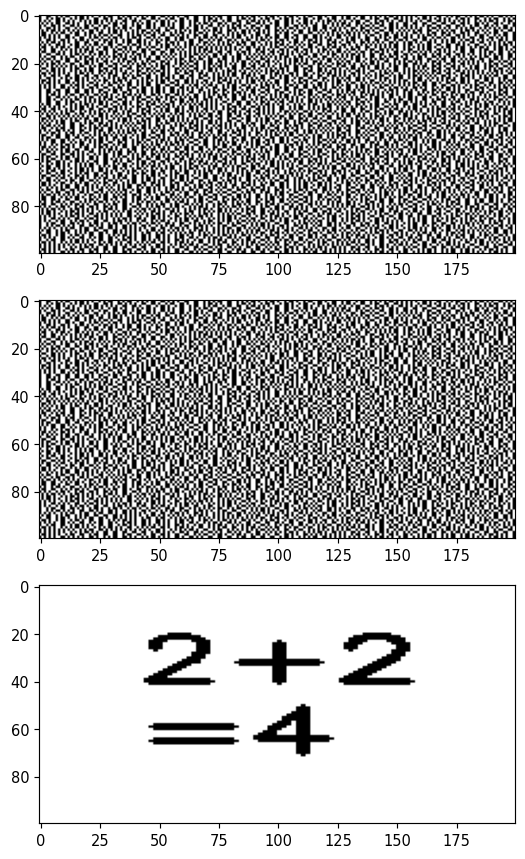

In [8]:
# Rozdziel obraz na dwa udziały
s1, s2 = split_shares(img)

# Połącz udziały
z = join_shares(s1, s2)

fig, (ax1,ax2,ax3) = plt.subplots(nrows=3, figsize=(6, 10))
ax1.imshow(s1, cmap='gray')
ax2.imshow(s2, cmap='gray')
ax3.imshow(z, cmap='gray')